In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [13]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

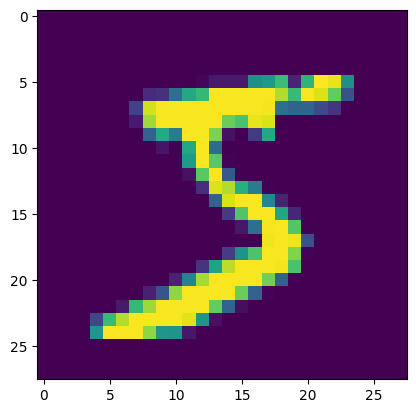

In [19]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [20]:
#for scaling all values b/w 0-1

X_train=X_train/255
X_test=X_test/255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [45]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
# model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #use softmax act. func for multi class classification problem

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2907 - accuracy: 0.9164 - val_loss: 0.1485 - val_accuracy: 0.9586
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1288 - accuracy: 0.9625 - val_loss: 0.1178 - val_accuracy: 0.9646
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0966 - val_accuracy: 0.9716
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.1011 - val_accuracy: 0.9699
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0886 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.1063 - val_accuracy:

In [49]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [50]:
y_pred=y_prob.argmax(axis=1)

In [51]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9761

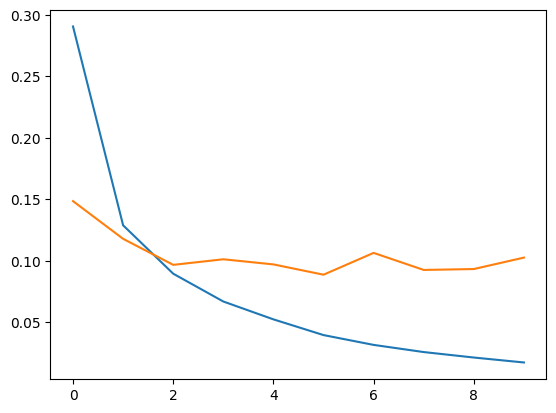

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

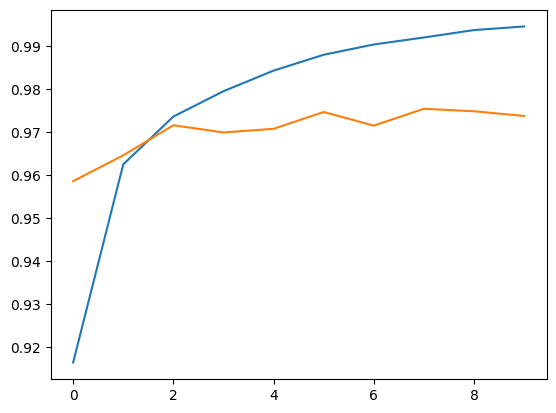

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

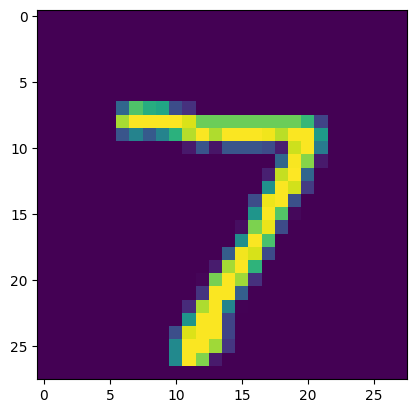

In [55]:
plt.imshow(X_test[0])

In [60]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 64ms/step


array([7])